In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D


df = pd.read_csv("../datasets/datasetFINALE.csv")

In [10]:
from scipy.spatial.distance import euclidean
from sklearn.metrics import jaccard_similarity_score as jaccard

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['tenure','MonthlyCharges','ServiceCount']].values)

In [5]:
df[['tenure','MonthlyCharges','ServiceCount']] = X
df.head()

,SeniorCitizen,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,ServiceCount,PhoneService
0,No,No,0.013889,DSL,Month-to-month,Yes,Electronic check,0.115423,No,0.166667,No phone service
1,No,No,0.472222,DSL,One year,No,Mailed check,0.385075,No,0.333333,Single line
2,No,No,0.027778,DSL,Month-to-month,Yes,Mailed check,0.354229,Yes,0.333333,Single line
3,No,No,0.625000,DSL,One year,No,Bank transfer (automatic),0.239303,No,0.500000,No phone service
4,No,No,0.027778,Fiber optic,Month-to-month,Yes,Electronic check,0.521891,Yes,0.000000,Single line


In [6]:
label_encoders = dict()
column2encode = ['SeniorCitizen','Dependents','InternetService','Contract',
                 'PaperlessBilling','PaymentMethod','PhoneService']

for col in column2encode:
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    label_encoders[col] = le

In [7]:
target=df.Churn
df=df.drop('Churn',axis=1)
df.head()

,SeniorCitizen,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,ServiceCount,PhoneService
0,0,0,0.013889,0,0,1,2,0.115423,0.166667,1
1,0,0,0.472222,0,1,0,3,0.385075,0.333333,2
2,0,0,0.027778,0,0,1,3,0.354229,0.333333,2
3,0,0,0.625000,0,1,0,0,0.239303,0.500000,1
4,0,0,0.027778,1,0,1,2,0.521891,0.000000,2


In [8]:
numerici=df[['tenure','MonthlyCharges','ServiceCount']]
df=df.drop(['tenure','MonthlyCharges','ServiceCount'],axis=1)
df[['tenure','MonthlyCharges','ServiceCount']]=numerici
df.head()

,SeniorCitizen,Dependents,InternetService,Contract,PaperlessBilling,PaymentMethod,PhoneService,tenure,MonthlyCharges,ServiceCount
0,0,0,0,0,1,2,1,0.013889,0.115423,0.166667
1,0,0,0,1,0,3,2,0.472222,0.385075,0.333333
2,0,0,0,0,1,3,2,0.027778,0.354229,0.333333
3,0,0,0,1,0,0,1,0.625000,0.239303,0.500000
4,0,0,1,0,1,2,2,0.027778,0.521891,0.000000


In [2]:
def my_dist(x,y):
    n_num=3
    n_cat=7
    return (n_num/(n_num+n_cat))*euclidean(x[n_cat:(n_num+n_cat)],y[n_cat:(n_num+n_cat)])+(n_cat/(n_num+n_cat))*hamming(x[:n_cat],y[:n_cat])

In [11]:
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
from scipy.spatial.distance import hamming as hamming

In [12]:
dist=pdist(df.values,my_dist)

In [13]:
dist_square = squareform(dist)

In [14]:
df[['tenure','MonthlyCharges','ServiceCount']]=scaler.inverse_transform(df[['tenure','MonthlyCharges','ServiceCount']].values)

Hierarchical

In [62]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

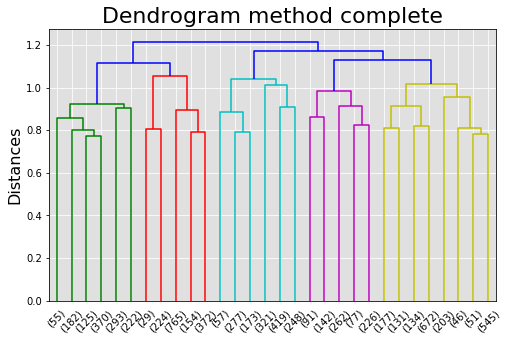

In [69]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

data_link = linkage(dist, method='complete', metric='precomputed')
res = dendrogram(data_link, color_threshold=1.1, truncate_mode='lastp')

plt.ylabel('Distances', fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Dendrogram method complete', fontsize=22)

plt.savefig('dendogram_complete.png')

In [39]:
conta = {}

for c in fcluster(data_link, t=1.1, criterion='distance'):
    if c not in conta:
        conta[c] = 0
    conta[c] += 1

print("Clusters:", len(conta.keys()))
list(reversed(sorted(conta.values())))

Clusters: 5


[1959, 1544, 1495, 1247, 798]

In [45]:
score = silhouette_score(dist_square, fcluster(data_link, t=1.1, criterion='distance'))
score

0.16888734228139946

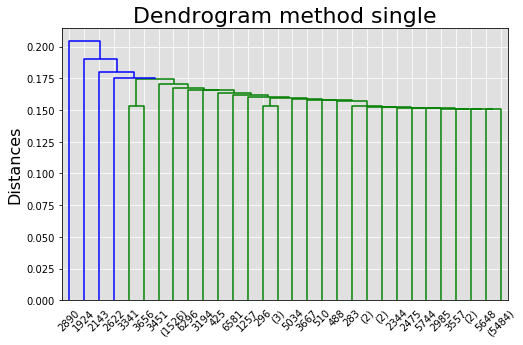

In [70]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

data_link = linkage(dist, method='single', metric='precomputed')
res = dendrogram(data_link, color_threshold=0.175, truncate_mode='lastp')

plt.ylabel('Distances', fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Dendrogram method single', fontsize=22)

plt.savefig('dendogram_single.png')

In [48]:
conta = {}

for c in fcluster(data_link, t=0.175, criterion='distance'):
    if c not in conta:
        conta[c] = 0
    conta[c] += 1

print("Clusters:", len(conta.keys()))
list(reversed(sorted(conta.values())))

Clusters: 5


[7039, 1, 1, 1, 1]

In [50]:
score = silhouette_score(dist_square, fcluster(data_link, t=0.175, criterion='distance'))
score

-0.20707665132731687

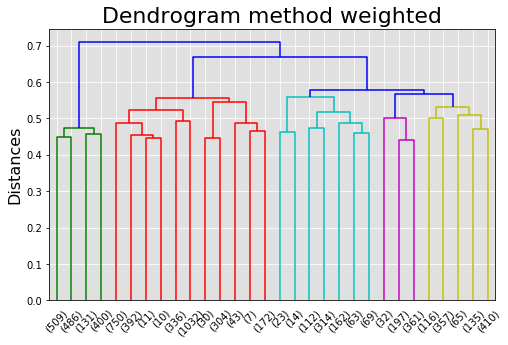

In [71]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

data_link = linkage(dist, method='weighted', metric='precomputed')
res = dendrogram(data_link, color_threshold=0.56, truncate_mode='lastp')

plt.ylabel('Distances', fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Dendrogram method weighted', fontsize=22)

plt.savefig('dendogram_weighted.png')

In [54]:
conta = {}

for c in fcluster(data_link, t=0.56, criterion='distance'):
    if c not in conta:
        conta[c] = 0
    conta[c] += 1

print("Clusters:", len(conta.keys()))
list(reversed(sorted(conta.values())))

Clusters: 5


[3087, 1526, 1083, 757, 590]

In [55]:
score = silhouette_score(dist_square, fcluster(data_link, t=0.56, criterion='distance'))
score

0.30397243918308475

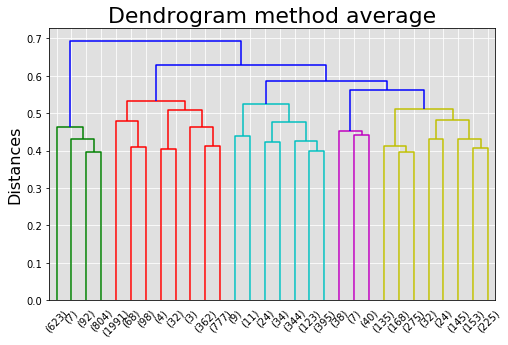

In [74]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

data_link = linkage(dist, method='average', metric='precomputed')
res = dendrogram(data_link, color_threshold=0.55, truncate_mode='lastp')

plt.ylabel('Distances', fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Dendrogram method average', fontsize=22)

plt.savefig('dendogram_average.png')

In [57]:
conta = {}

for c in fcluster(data_link, t=0.55, criterion='distance'):
    if c not in conta:
        conta[c] = 0
    conta[c] += 1

print("Clusters:", len(conta.keys()))
list(reversed(sorted(conta.values())))

Clusters: 5


[3335, 1526, 1157, 940, 85]

In [58]:
score = silhouette_score(dist_square, fcluster(data_link, t=0.55, criterion='distance'))
score

0.1720961814411519

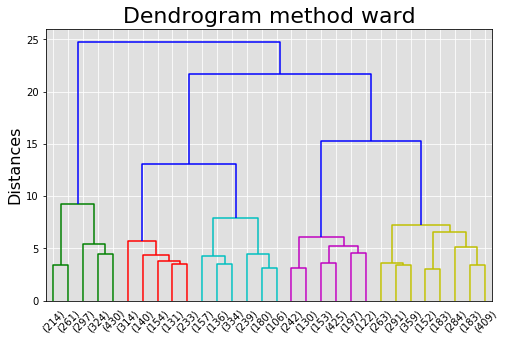

In [73]:
f = plt.figure(figsize=(8,5))
ax = f.add_subplot(1,1,1)

data_link = linkage(dist, method='ward', metric='precomputed')
res = dendrogram(data_link, color_threshold=10, truncate_mode='lastp')

plt.ylabel('Distances', fontsize=16)
plt.xlabel('', fontsize=16)
plt.xticks()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Cost by K', fontsize=22)

plt.grid(color='w')
ax.set_axisbelow(True)
ax.set_facecolor('#E0E0E0')
plt.title('Dendrogram method ward', fontsize=22)

plt.savefig('dendogram_ward.png')

In [60]:
conta = {}

for c in fcluster(data_link, t=10, criterion='distance'):
    if c not in conta:
        conta[c] = 0
    conta[c] += 1

print("Clusters:", len(conta.keys()))
list(reversed(sorted(conta.values())))

Clusters: 5


[2124, 1526, 1269, 1152, 972]

In [61]:
score = silhouette_score(dist_square, fcluster(data_link, t=10, criterion='distance'))
score

0.2091524668262429